# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Automated Anomaly Detection using Z-score method

**Steps**:
1. Data Set: Download a dataset representing daily sales figures for a retail store.
2. Calculate Z-score: Compute the mean and standard deviation of the sales. Use these to
calculate the Z-score for each day's sales figure.
3. Identify Anomalies: Detect anomalies by identifying values with a Z-score above 3 or below -3.
4. Visualize: Plot a graph to visualize anomalies.

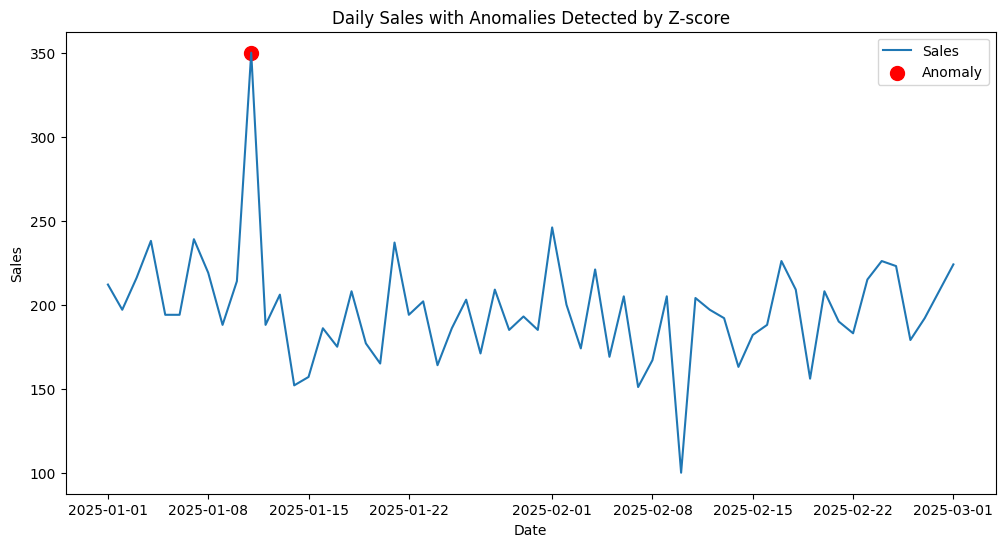

In [1]:
# write your code from here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Sample daily sales data (replace with dataset download if needed)
dates = pd.date_range(start="2025-01-01", periods=60)
np.random.seed(42)
sales = np.random.normal(loc=200, scale=25, size=60).round()

# Inject anomalies
sales[10] = 350  # High spike
sales[40] = 100  # Low dip

df = pd.DataFrame({"date": dates, "sales": sales})

# 2. Calculate mean and std dev
mean_sales = df["sales"].mean()
std_sales = df["sales"].std()

# Calculate Z-score
df["z_score"] = (df["sales"] - mean_sales) / std_sales

# 3. Identify anomalies with Z-score > 3 or < -3
df["anomaly"] = ((df["z_score"] > 3) | (df["z_score"] < -3))

# 4. Visualization
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["sales"], label="Sales")
plt.scatter(df.loc[df["anomaly"], "date"], df.loc[df["anomaly"], "sales"], 
            color="red", label="Anomaly", s=100)
plt.title("Daily Sales with Anomalies Detected by Z-score")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()